In [33]:

import imgaug as ia
ia.seed(1)
# imgaug uses matplotlib backend for displaying images
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug import augmenters as iaa 
# imageio library will be used for image input/output
import imageio
import pandas as pd
import numpy as np
import re
import os
import glob
# this library is needed to read XML files for converting it into CSV
import xml.etree.ElementTree as ET
import shutil
from PIL import Image
from PIL import Image, ImageEnhance

# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from tensorflow.keras.optimizers import RMSprop
 
img_width, img_height = 256, 256

plt.rcParams['figure.figsize'] = [15,8]

import warnings
warnings.filterwarnings("ignore")

In [34]:
#!pip install tensorflow

In [35]:
#!pip install google

In [36]:
# import the necessary packages
#from pyimagesearch import config
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import imutils
import cv2
import os

In [37]:
#!pip install tensorflow-gpu==2.2.0
#!pip install tf-models-official==2.6.0


Found 520 files belonging to 2 classes.


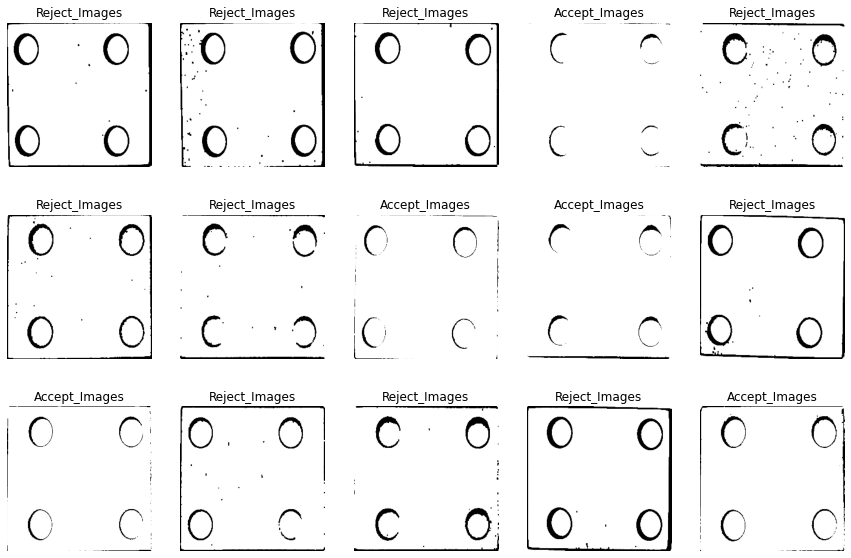

In [38]:
train_dataset = image_dataset_from_directory('C:\\Users\\nabhishe\\MITC_Project\\reinforced_images4',
                                             shuffle=True,
                                             batch_size=32,image_size=(256,256))
class_name =  train_dataset.class_names
plt.figure(figsize = (15,10))
for image , label in train_dataset.take(1):
    for i in range(15) :
        plt.subplot(3,5,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [39]:
data_path = 'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images4'
#nb_train_samples =1028
#nb_validation_samples = 200
epochs = 10
batch_size = 50

In [8]:
# Using ImageDataGnerator

train_datagen1 = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2, #Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,# Float or [lower, upper]. Range for random zoom. 
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1.0/255,#If None or 0, no rescaling is applied.
    validation_split=0.3
    )
 
test_datagen1 = ImageDataGenerator(rescale=1./255)
 

In [30]:
train_generator1 = train_datagen1.flow_from_directory(
    data_path,
    target_size = (256, 256), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 64,#size of the batches of data (default: 32).
    class_mode = 'binary',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    subset='training',#Subset of data ("training" or "validation")
    seed = 123)

Found 365 images belonging to 2 classes.


In [31]:
validation_generator1 = train_datagen1.flow_from_directory(
    data_path,
    target_size = (256, 256), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 64,#size of the batches of data (default: 32).
    class_mode = 'binary',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    subset='validation',#Subset of data ("training" or "validation")
    seed = 123)

Found 155 images belonging to 2 classes.


#### Model 1

In [11]:
# Model 1

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

model1=Sequential()

# Layer 1
model1.add(Conv2D(filters=32, kernel_size=(3,3) ,input_shape=(256,256,1), activation='relu'))
#model.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

# Layer 2
model1.add(Conv2D(64,(3,3),activation='relu'))
#model.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.1))

# Layer 3
model1.add(Conv2D(128,(3,3),activation='relu'))
#model.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.1))

# Flattening
model1.add(Flatten())                      

# Dense Layer
model1.add(Dense(512,activation='relu'))
#model1.add(Dense(128,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))


In [12]:
# Model Compilation
model1.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [14]:
M2=model1.fit(train_generator1, epochs=100, verbose=1, validation_data=validation_generator1,shuffle=True)

Epoch 1/100
12/12 [==============================] - 37s 3s/step - loss: 1.4696 - accuracy: 0.5397 - val_loss: 0.6880 - val_accuracy: 0.5419
Epoch 2/100
12/12 [==============================] - 39s 3s/step - loss: 0.6783 - accuracy: 0.5452 - val_loss: 0.6781 - val_accuracy: 0.5419
Epoch 3/100
12/12 [==============================] - 36s 3s/step - loss: 0.6185 - accuracy: 0.6055 - val_loss: 0.6310 - val_accuracy: 0.5613
Epoch 4/100
12/12 [==============================] - 36s 3s/step - loss: 0.4676 - accuracy: 0.7699 - val_loss: 0.3666 - val_accuracy: 0.8645
Epoch 5/100
12/12 [==============================] - 37s 3s/step - loss: 0.3061 - accuracy: 0.8877 - val_loss: 0.2796 - val_accuracy: 0.9032
Epoch 6/100
12/12 [==============================] - 40s 3s/step - loss: 0.1947 - accuracy: 0.9123 - val_loss: 0.2238 - val_accuracy: 0.9097
Epoch 7/100
12/12 [==============================] - 38s 3s/step - loss: 0.1405 - accuracy: 0.9452 - val_loss: 0.1179 - val_accuracy: 0.9806
Epoch 8/100
1

Epoch 59/100
12/12 [==============================] - 47s 4s/step - loss: 0.0701 - accuracy: 0.9699 - val_loss: 0.0573 - val_accuracy: 0.9742
Epoch 60/100
12/12 [==============================] - 46s 4s/step - loss: 0.0332 - accuracy: 0.9918 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 61/100
12/12 [==============================] - 42s 3s/step - loss: 0.0323 - accuracy: 0.9836 - val_loss: 0.0666 - val_accuracy: 0.9806
Epoch 62/100
12/12 [==============================] - 40s 3s/step - loss: 0.0412 - accuracy: 0.9863 - val_loss: 0.0532 - val_accuracy: 0.9871
Epoch 63/100
12/12 [==============================] - 41s 3s/step - loss: 0.0393 - accuracy: 0.9863 - val_loss: 0.0556 - val_accuracy: 0.9871
Epoch 64/100
12/12 [==============================] - 41s 3s/step - loss: 0.0454 - accuracy: 0.9808 - val_loss: 0.0598 - val_accuracy: 0.9806
Epoch 65/100
12/12 [==============================] - 44s 4s/step - loss: 0.0187 - accuracy: 0.9890 - val_loss: 0.0607 - val_accuracy: 0.9742
Epoch 

In [15]:
# Saving the Model 
model1.save('classification_weight.hdf5')

In [16]:
def plot_performance(model_history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.plot(model_history.history['accuracy'], 'b', label='train_acc')
    plt.plot(model_history.history['val_accuracy'], 'y', label='val_acc')
    plt.legend()
    plt.title("Train-Validation accuracy vs Epochs")
    plt.subplot(1,2,2)
    plt.grid(True)
    plt.plot(model_history.history['loss'], 'b--', label='train_loss')
    plt.plot(model_history.history['val_loss'], 'y--', label='val_loss')
    plt.title("Train-Validation Loss vs Epochs")
    plt.legend()
    plt.show()

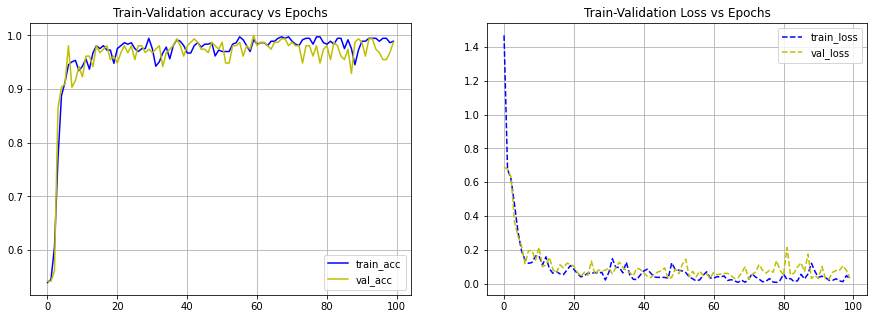

In [17]:
plot_performance(M2)

In [15]:
model2 = load_model('classification_weight.hdf5')
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

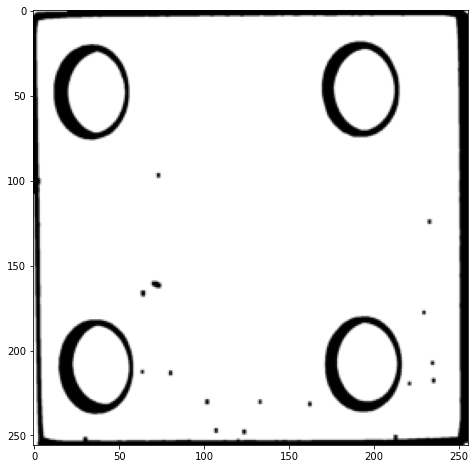

Predicted Class (0 - Accept , 1 - Reject):  0.9999751


In [27]:
# Example 1

# Prediction based on New Model

from skimage import data, exposure

from PIL import Image
import numpy as np
from skimage import transform
from skimage.color import rgb2gray

from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

model2 = load_model('classification_weight.hdf5')

def accept_bright(custom_img):
    
    # Bright Accept Images
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=100)
    blurred = cv2.GaussianBlur(contrast, (7, 7), 0)
    thresh = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=3)
    thresh = cv2.dilate(thresh, None, iterations=5)
    return thresh

def accept_low(custom_img):
    
    # Low Accept Images
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=110)
    blurred = cv2.GaussianBlur(contrast, (5, 5), 0)
    thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=5)
    thresh = cv2.dilate(thresh, None, iterations=5)
    return thresh

def reject_bright(custom_img):
    
    # Bright Reject Images
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=60)
    blurred = cv2.GaussianBlur(contrast, (7, 7), 0)
    thresh = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=7)
    thresh = cv2.dilate(thresh, None, iterations=3)
    return thresh

def reject_low(custom_img):
    
    # Dark Reject Images
    #contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=100)
    #blurred = cv2.GaussianBlur(contrast, (3, 3), 0)
    #thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]
    #thresh = cv2.erode(thresh, None, iterations=7)
    #thresh = cv2.dilate(thresh, None, iterations=3)
    #return thresh

    # dark reject Images with Adaptive threshold
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=50)
    blurred = cv2.GaussianBlur(contrast, (3, 3), 0)
    thresh = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=7)
    thresh = cv2.dilate(thresh, None, iterations=3)
    return thresh

def load(img):
    threshold = 140
    if np.mean(img) > threshold:
        #image = Image.open(img)
        image = Image.fromarray(img)
        images = image.convert(mode = 'L')
        image_np = np.array(images)
        sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])       # sharpening the image
        custom_img = cv2.filter2D(image_np,-1,sharp)
        
        # Blob implementation
        detector = cv2.SimpleBlobDetector_create()
        # Detect blobs.
        keypoints = detector.detect(custom_img)
        num_blobs = len(keypoints)
        if num_blobs > 0:
            w = reject_bright(custom_img)
            np_image = Image.fromarray(w)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image
        else:
            x = accept_bright(custom_img)
            np_image = Image.fromarray(x)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image
        
    elif np.mean(img) < threshold:
        adapthist_image = exposure.equalize_hist(img)
        im = Image.fromarray((adapthist_image*255).astype(np.uint8))
        images = im.convert(mode = 'L')
        image_np = np.array(images)
        sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])       # sharpening the image
        custom_img=cv2.filter2D(image_np,-1,sharp)
        # Blob implementation
        detector = cv2.SimpleBlobDetector_create()
        # Detect blobs.
        keypoints = detector.detect(custom_img)
        num_blobs = len(keypoints)
        if num_blobs > 0:
            y = reject_low(custom_img)
            np_image = Image.fromarray(y)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image
        else:
            img = Image.fromarray(img)
            images = img.convert(mode = 'L')
            image_np = np.array(images)
            sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])       # sharpening the image
            custom_img=cv2.filter2D(image_np,-1,sharp)
            z = accept_low(custom_img)
            np_image = Image.fromarray(z)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image


inp = plt.imread('C:\\Users\\nabhishe\\MITC_Project\\RGB_Test\\Reject-A26491-001-Sample - 20-2..jpg')
image2 = load(inp)
label = model2.predict(image2)
plt.imshow(image2.reshape(256,256),cmap='gray')
plt.show()
print("Predicted Class (0 - Accept , 1 - Reject): ", label[0][0])

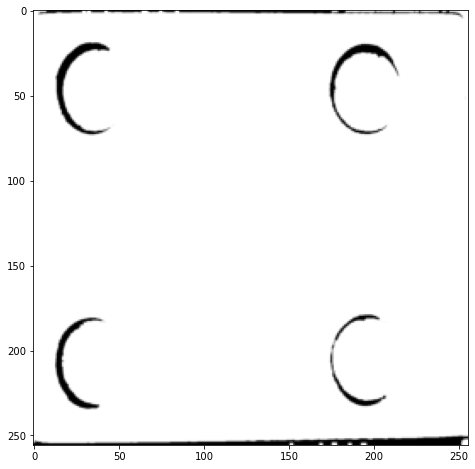

Predicted Class (0 - Accept , 1 - Reject):  0.00013780594


In [24]:
# Example 2

# Prediction based on New Model

from skimage import data, exposure

from PIL import Image
import numpy as np
from skimage import transform
from skimage.color import rgb2gray

from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

model2 = load_model('classification_weight.hdf5')

def accept_bright(custom_img):
    
    # Bright Accept Images
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=100)
    blurred = cv2.GaussianBlur(contrast, (7, 7), 0)
    thresh = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=3)
    thresh = cv2.dilate(thresh, None, iterations=5)
    return thresh

def accept_low(custom_img):
    
    # Low Accept Images
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=110)
    blurred = cv2.GaussianBlur(contrast, (5, 5), 0)
    thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=5)
    thresh = cv2.dilate(thresh, None, iterations=5)
    return thresh

def reject_bright(custom_img):
    
    # Bright Reject Images
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=60)
    blurred = cv2.GaussianBlur(contrast, (7, 7), 0)
    thresh = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=7)
    thresh = cv2.dilate(thresh, None, iterations=3)
    return thresh

def reject_low(custom_img):
    
    # Dark Reject Images
    #contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=100)
    #blurred = cv2.GaussianBlur(contrast, (3, 3), 0)
    #thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]
    #thresh = cv2.erode(thresh, None, iterations=7)
    #thresh = cv2.dilate(thresh, None, iterations=3)
    #return thresh

    # dark reject Images with Adaptive threshold
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=50)
    blurred = cv2.GaussianBlur(contrast, (3, 3), 0)
    thresh = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=7)
    thresh = cv2.dilate(thresh, None, iterations=3)
    return thresh

def load(img):
    threshold = 140
    if np.mean(img) > threshold:
        #image = Image.open(img)
        image = Image.fromarray(img)
        images = image.convert(mode = 'L')
        image_np = np.array(images)
        sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])       # sharpening the image
        custom_img = cv2.filter2D(image_np,-1,sharp)
        
        # Blob implementation
        detector = cv2.SimpleBlobDetector_create()
        # Detect blobs.
        keypoints = detector.detect(custom_img)
        num_blobs = len(keypoints)
        if num_blobs > 0:
            w = reject_bright(custom_img)
            np_image = Image.fromarray(w)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image
        else:
            x = accept_bright(custom_img)
            np_image = Image.fromarray(x)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image
        
    elif np.mean(img) < threshold:
        adapthist_image = exposure.equalize_hist(img)
        im = Image.fromarray((adapthist_image*255).astype(np.uint8))
        images = im.convert(mode = 'L')
        image_np = np.array(images)
        sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])       # sharpening the image
        custom_img=cv2.filter2D(image_np,-1,sharp)
        # Blob implementation
        detector = cv2.SimpleBlobDetector_create()
        # Detect blobs.
        keypoints = detector.detect(custom_img)
        num_blobs = len(keypoints)
        if num_blobs > 0:
            y = reject_low(custom_img)
            np_image = Image.fromarray(y)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image
        else:
            img = Image.fromarray(img)
            images = img.convert(mode = 'L')
            image_np = np.array(images)
            sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])       # sharpening the image
            custom_img=cv2.filter2D(image_np,-1,sharp)
            z = accept_low(custom_img)
            np_image = Image.fromarray(z)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image


inp = plt.imread('C:\\Users\\nabhishe\\MITC_Project\\RGB_Test\\Accept-A26491-001-Sample-38-1.jpg')
image2 = load(inp)
label = model2.predict(image2)
plt.imshow(image2.reshape(256,256),cmap='gray')
plt.show()
print("Predicted Class (0 - Accept , 1 - Reject): ", label[0][0])

#### Model 2 (Tuning with Categorical Crossentropy)

In [40]:
# Using ImageDataGnerator

train_datagen2 = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2, #Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,# Float or [lower, upper]. Range for random zoom. 
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1.0/255,#If None or 0, no rescaling is applied.
    validation_split=0.3
    )
 
test_datagen2 = ImageDataGenerator(rescale=1./255)
 

In [41]:
train_generator2 = train_datagen2.flow_from_directory(
    data_path,
    target_size = (256, 256), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 64,#size of the batches of data (default: 32).
    class_mode = 'categorical',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    subset='training',#Subset of data ("training" or "validation")
    seed = 123)

Found 365 images belonging to 2 classes.


In [42]:
validation_generator2 = train_datagen2.flow_from_directory(
    data_path,
    target_size = (256, 256), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 64,#size of the batches of data (default: 32).
    class_mode = 'categorical',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    subset='validation',#Subset of data ("training" or "validation")
    seed = 123)

Found 155 images belonging to 2 classes.


In [43]:
# Model 1

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

model2=Sequential()

# Layer 1
model2.add(Conv2D(filters=32, kernel_size=(3,3) ,input_shape=(256,256,1), activation='relu'))
#model.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

# Layer 2
model2.add(Conv2D(64,(3,3),activation='relu'))
#model.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.1))

# Layer 3
model2.add(Conv2D(128,(3,3),activation='relu'))
#model.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.1))

# Flattening
model2.add(Flatten())                      

# Dense Layer
#model2.add(Dense(512,activation='relu'))
#model1.add(Dense(128,activation='relu'))
#model2.add(Dense(64,activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(2,activation='softmax'))


In [44]:
# Model Compilation
model2.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [45]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 62, 62, 64)       

In [46]:
MT=model2.fit(train_generator2, epochs=100, verbose=1, validation_data=validation_generator2,shuffle=True)

Epoch 1/100
6/6 [==============================] - 37s 6s/step - loss: 2.1726 - accuracy: 0.4658 - val_loss: 0.6863 - val_accuracy: 0.5419
Epoch 2/100
6/6 [==============================] - 37s 6s/step - loss: 0.6800 - accuracy: 0.5452 - val_loss: 0.6776 - val_accuracy: 0.5419
Epoch 3/100
6/6 [==============================] - 38s 6s/step - loss: 0.6533 - accuracy: 0.5452 - val_loss: 0.6607 - val_accuracy: 0.5419
Epoch 4/100
6/6 [==============================] - 37s 6s/step - loss: 0.6068 - accuracy: 0.5452 - val_loss: 0.6159 - val_accuracy: 0.5419
Epoch 5/100
6/6 [==============================] - 37s 7s/step - loss: 0.5972 - accuracy: 0.5452 - val_loss: 0.6232 - val_accuracy: 0.6194
Epoch 6/100
6/6 [==============================] - 44s 7s/step - loss: 0.5696 - accuracy: 0.5534 - val_loss: 0.5865 - val_accuracy: 0.6323
Epoch 7/100
6/6 [==============================] - 36s 6s/step - loss: 0.5222 - accuracy: 0.6356 - val_loss: 0.5281 - val_accuracy: 0.6968
Epoch 8/100
6/6 [==========

In [47]:
# Saving the Model 
model2.save('classification_weight_mt.hdf5')

In [48]:
def plot_performance(model_history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.plot(model_history.history['accuracy'], 'b', label='train_acc')
    plt.plot(model_history.history['val_accuracy'], 'y', label='val_acc')
    plt.legend()
    plt.title("Train-Validation accuracy vs Epochs")
    plt.subplot(1,2,2)
    plt.grid(True)
    plt.plot(model_history.history['loss'], 'b--', label='train_loss')
    plt.plot(model_history.history['val_loss'], 'y--', label='val_loss')
    plt.title("Train-Validation Loss vs Epochs")
    plt.legend()
    plt.show()

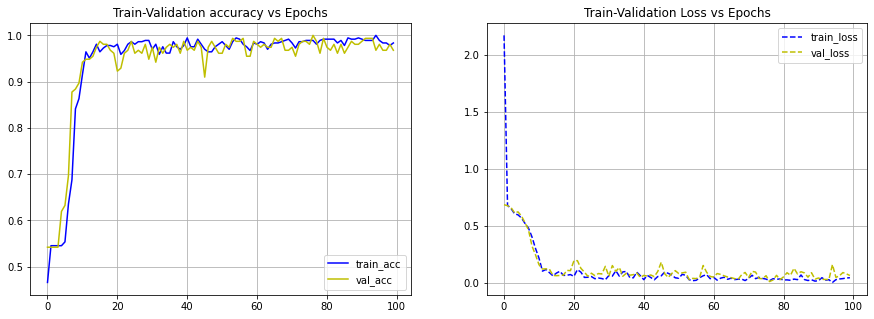

In [49]:
plot_performance(MT)